In [132]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import string
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scikitplot

In [92]:
data = pd.read_csv('cleaned_data.csv')

In [93]:
data.head()

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,ep travelling through north east india off to ...,the journey to arunachal north east india begi...,travel
1,1,e2NQE41J5eM,how do i travel so much how do i earn money,subscribe mountaintrekker gimbal if you have a...,travel
2,2,i9E_Blai8vk,travel vlog welcome to bali priscilla lee,i had the chance to fly out to bali with my wh...,travel
3,3,-LzdIILq5vE,goa travel diary four days in goa travel outfi...,hope you enjoy my goa travel diary this video ...,travel
4,4,7ByoBJYXU0k,steps to becoming a travel blogger,travel blogger nikki vargas of the pin the map...,travel


In [94]:
data.dtypes

Unnamed: 0      int64
Video Id       object
Title          object
Description    object
Category       object
dtype: object

### deviding the data into train test and validation using 80: 10 :10

In [95]:
X_train,X_test,y_train,y_test = train_test_split(data['Title'].values,data['Category'].values, test_size=.1)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size=.1)

In [96]:
X_train

array(['rick ross aston martin music ft drake chrisette michele official video',
       'introduction to lean manufacturing',
       'first opium war trade deficits and the macartney embassy extra history',
       ..., 'end game theatre reaction',
       'das ultimative home theatre setup htpc selber bauen und die passende peripherie',
       'islam the quran and the five pillars all without a flamewar crash course world history'],
      dtype=object)

In [99]:
count = 0 
for v in X_train:
    if type(v)!=str:
        X_train[count] = 'x'
    count+=1

In [100]:
count = 0 
for v in X_test:
    if type(v)!=str:
        X_test[count] = 'x'
    count+=1

In [101]:
count = 0 
for v in X_cv:
    if type(v)!=str:
        X_cv[count] = 'x'
    count+=1

### converting the Title into numerical vector using tf-idf

In [102]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(X_train)
x_test = tfidf.transform(X_test)
x_cv = tfidf.transform(X_cv)

### applying Logistic Regression over the title:

In [105]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [123]:
train_acc = []
cv_acc = []
print("C ---------> CV Accuracy ********** Train Accuracy")
for c in [.001,.01,.1,1,10,100,1000]:
    model = LR(C=c)
    model.fit(x_train,y_train)
    y_pre = model.predict(x_cv)
    y_pre1 = model.predict(x_train)
    acc = accuracy_score(y_cv,y_pre)
    acc1 = accuracy_score(y_train,y_pre1)
    print(c,"--------->",acc,"**********",acc1)
    cv_acc.append(acc)
    train_acc.append(acc1)

C ---------> CV Accuracy ********** Train Accuracy
0.001 ---------> 0.9268817204301075 ********** 0.9281873581073008
0.01 ---------> 0.967741935483871 ********** 0.9645118891145895
0.1 ---------> 0.9827956989247312 ********** 0.9787310311865217
1 ---------> 0.9913978494623656 ********** 0.992352730314255
10 ---------> 0.989247311827957 ********** 0.9973712510455252
100 ---------> 0.9881720430107527 ********** 0.9978492054008842
1000 ---------> 0.9881720430107527 ********** 0.9978492054008842


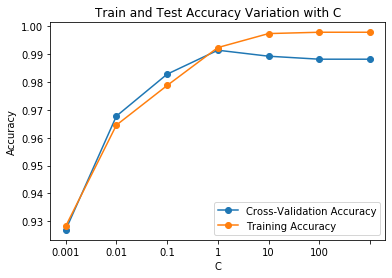

In [128]:
plt.plot(cv_acc,marker='o')
plt.plot(train_acc,marker = 'o')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy Variation with C")
plt.xticks(np.arange(7),[.001,.01,.1,1,10,100])
plt.legend(["Cross-Validation Accuracy","Training Accuracy"])
plt.show()

- from the above plot we can see that at C=1, our model's cv accuracy is equivalent to train accuracy but after that it start overfitting so we will choose C = 1 for the final modeling

### Final Evaluation on the test data

In [131]:
model = LR(C=1)
model.fit(x_train,y_train)
y_pre = model.predict(x_test)
y_pre1 = model.predict(x_train)
acc = accuracy_score(y_test,y_pre)
acc1 = accuracy_score(y_train,y_pre1)
print("Training Accuracy of the Model",acc1)
print("Test Accuracy of the Model",acc)

Training Accuracy of the Model 0.992352730314255
Test Accuracy of the Model 0.9787234042553191


### confusion matrix for test dataset

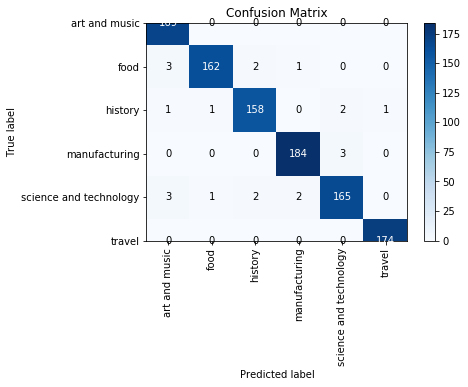

In [139]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pre,x_tick_rotation=90)
plt.show()

### confusion matrix for train dataset

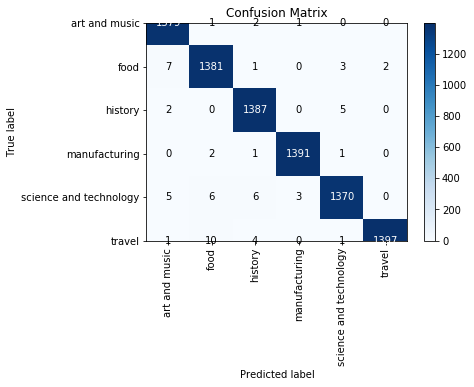

In [138]:
scikitplot.metrics.plot_confusion_matrix(y_train, y_pre1,x_tick_rotation=90)
plt.show()

## Apply XGboost model

In [147]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier as RF

In [160]:
cv_acc = []
train_acc = []
print("Min Split---n_estimators---max_depth---> Train Accuracy ********** Cross-Val Accuracy")
for s in [2,3,4,5,6,7]:
    for tree in [20,40,60,80,100,125,150,180,200]:
        for d in [10,11,12]:
            model = RF(n_estimators=tree,max_depth = d,min_samples_split = s)
            model.fit(x_train,y_train)
            y_pre = model.predict(x_cv)
            y_pre1 = model.predict(x_train)
            acc = accuracy_score(y_cv,y_pre)
            acc1 = accuracy_score(y_train,y_pre1)
            print(s,"------------",tree,"---",d,"---> ",acc1," **********",acc)
            cv_acc.append(acc)
            train_acc.append(acc1)
            print("**********"*5)

Min Split---n_estimators---max_depth---> Train Accuracy ********** Cross-Val Accuracy
2 ------------ 20 --- 10 --->  0.8860078862468634  ********** 0.889247311827957
**************************************************
2 ------------ 20 --- 11 --->  0.9065599235273032  ********** 0.9096774193548387
**************************************************
2 ------------ 20 --- 12 --->  0.9290237782291791  ********** 0.9419354838709677
**************************************************
2 ------------ 40 --- 10 --->  0.9532799617636516  ********** 0.9602150537634409
**************************************************
2 ------------ 40 --- 11 --->  0.9604492770940375  ********** 0.9591397849462365
**************************************************
2 ------------ 40 --- 12 --->  0.9641534233480703  ********** 0.9666666666666667
**************************************************
2 ------------ 60 --- 10 --->  0.9614051858047556  ********** 0.9559139784946237
******************************************

4 ------------ 60 --- 12 --->  0.9585374596726013  ********** 0.9634408602150538
**************************************************
4 ------------ 80 --- 10 --->  0.969888875612379  ********** 0.9731182795698925
**************************************************
4 ------------ 80 --- 11 --->  0.9720396702114948  ********** 0.9763440860215054
**************************************************
4 ------------ 80 --- 12 --->  0.9691719440793404  ********** 0.9655913978494624
**************************************************
4 ------------ 100 --- 10 --->  0.9704863185565779  ********** 0.9741935483870968
**************************************************
4 ------------ 100 --- 11 --->  0.9718006930338152  ********** 0.9795698924731183
**************************************************
4 ------------ 100 --- 12 --->  0.9725176245668539  ********** 0.9763440860215054
**************************************************
4 ------------ 125 --- 10 --->  0.9670211494802247  ********** 0.975268817

6 ------------ 125 --- 11 --->  0.9713227386784562  ********** 0.975268817204301
**************************************************
6 ------------ 125 --- 12 --->  0.9721591588003345  ********** 0.9827956989247312
**************************************************
6 ------------ 150 --- 10 --->  0.9710837615007767  ********** 0.9763440860215054
**************************************************
6 ------------ 150 --- 11 --->  0.9709642729119369  ********** 0.9763440860215054
**************************************************
6 ------------ 150 --- 12 --->  0.9725176245668539  ********** 0.9838709677419355
**************************************************
6 ------------ 180 --- 10 --->  0.9708447843230972  ********** 0.9741935483870968
**************************************************
6 ------------ 180 --- 11 --->  0.971442227267296  ********** 0.9817204301075269
**************************************************
6 ------------ 180 --- 12 --->  0.971920181622655  ********** 0.9752688

In [163]:
model = RF(n_estimators=150,max_depth = 12,min_samples_split=3)
model.fit(x_train,y_train)
y_pre = model.predict(x_test)
y_pre1 = model.predict(x_train)
acc = accuracy_score(y_test,y_pre)
acc1 = accuracy_score(y_train,y_pre1)
print("Training Accuracy of the model: ",acc1)
print("Test Accuracy of the model: ",acc)

Training Accuracy of the model:  0.972398135978014
Test Accuracy of the model:  0.9738878143133463


In [174]:
feature_names=tfidf.get_feature_names()
w=model.feature_importances_
top_f=zip(feature_names,w)
top_new=list(top_f)
top_new.sort(reverse=True,key=lambda x:x[1])
top_20=top_new[0:20]
print("Top 20 Features According to Random Forest:")
print("********************************************")
top_20

Top 20 Features According to Random Forest:
********************************************


[('manufacturing', 0.08039636712678867),
 ('technology', 0.0484815723324932),
 ('travelling', 0.046447619801331094),
 ('food', 0.04254379100319116),
 ('snacks', 0.04077158738832936),
 ('travel', 0.03413689976709557),
 ('archaeology', 0.03290130812295662),
 ('computer', 0.03284561253020093),
 ('art', 0.03228393155374321),
 ('history', 0.030804849222499407),
 ('science', 0.03074775906596857),
 ('anthropology', 0.02704602003869516),
 ('cooking', 0.02683520774392281),
 ('blog', 0.025479411580571702),
 ('theatre', 0.021052150686206125),
 ('printing', 0.012170352145123535),
 ('music', 0.011731980972954364),
 ('process', 0.011257349431569768),
 ('video', 0.011006217553987716),
 ('painting', 0.010834138049352236)]